### Comparison of Models after Hyperparameter Tuning
YOLOv8x and YOLOv10x will be assessed for whether hyperparameter tuning has improved results over the default parameters

In [16]:
from ultralytics import YOLO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import image_transformation_functions as transf_func

### YOLOv8 Comparison
Compare the validation performance of default hyperparameters model with optimal hyperparameters model

In [19]:
# set file path for data.yaml file
data_yaml_file = "C:/Users/jamie/Python Projects/Dissertation/Task/datasets/WSP-9/data.yaml"
# set file path models folder
models_folder = "C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/GridSearchModels/"

In [21]:
# create models
default_v8_model = YOLO(f"{models_folder}yolov8_default_5_epochs.pt")
optimal_v8_model = YOLO(f"{models_folder}yolov8_optimal_hyperparameters_5_epochs.pt")

In [23]:
# validate default model
default_v8_metrics = default_v8_model.val(data=data_yaml_file)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 268 layers, 68,132,235 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\labels.cache... 359 images, 14 back
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [05:26


                   all        359       2011      0.826       0.73      0.817       0.65
           Articulated         68        113      0.736      0.788      0.838      0.671
                   Bus         56         89      0.868      0.787      0.839      0.718
                   Car        154       1251      0.894      0.879      0.942      0.637
                 Coach         24         29      0.885      0.552      0.722      0.621
                   LGV        180        273      0.815      0.733      0.826      0.634
          Rigid 2 Axle        123        168      0.838      0.614      0.823      0.618
          Rigid 3 Axle         17         17       0.61      0.588      0.636      0.545
          Rigid 4 Axle         41         42      0.943      0.976      0.983      0.836
                  Taxi         20         29      0.848      0.655       0.74      0.569
Speed: 3.9ms preprocess, 892.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs\dete

In [24]:
# validate optimal model
optimal_v8_metrics = optimal_v8_model.val(data=data_yaml_file)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
Model summary (fused): 268 layers, 68,132,235 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\labels.cache... 359 images, 14 back
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [06:17


                   all        359       2011      0.848      0.757      0.837      0.673
           Articulated         68        113      0.805      0.823      0.897      0.733
                   Bus         56         89      0.884      0.809      0.908      0.791
                   Car        154       1251      0.886      0.889      0.942       0.64
                 Coach         24         29      0.906      0.666       0.82      0.723
                   LGV        180        273      0.859      0.769      0.851      0.655
          Rigid 2 Axle        123        168      0.784      0.692      0.821       0.63
          Rigid 3 Axle         17         17      0.832      0.581      0.627      0.541
          Rigid 4 Axle         41         42       0.89      0.966      0.969      0.825
                  Taxi         20         29      0.788      0.621      0.695      0.516
Speed: 2.9ms preprocess, 1038.6ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\det

In [25]:
# create df for class AP50 for both models
yolov8_comparison_ap50_df = pd.DataFrame(
    [["Articulated", default_v8_metrics.box.ap50[0],"Default"],
    ["Articulated", optimal_v8_metrics.box.ap50[0],"Optimal"],
    ["Bus", default_v8_metrics.box.ap50[1],"Default"],
    ["Bus", optimal_v8_metrics.box.ap50[1],"Optimal"],
    ["Car", default_v8_metrics.box.ap50[2],"Default"],
    ["Car", optimal_v8_metrics.box.ap50[2],"Optimal"],
    ["Coach", default_v8_metrics.box.ap50[3],"Default"],
    ["Coach", optimal_v8_metrics.box.ap50[3],"Optimal"],
    ["LGV", default_v8_metrics.box.ap50[4],"Default"],
    ["LGV", optimal_v8_metrics.box.ap50[4],"Optimal"],
    ["Rigid 2 Axle", default_v8_metrics.box.ap50[5],"Default"],
    ["Rigid 2 Axle", optimal_v8_metrics.box.ap50[5],"Optimal"],
    ["Rigid 3 Axle", default_v8_metrics.box.ap50[6],"Default"],
    ["Rigid 3 Axle", optimal_v8_metrics.box.ap50[6],"Optimal"],
    ["Rigid 4 Axle", default_v8_metrics.box.ap50[7],"Default"],
    ["Rigid 4 Axle", optimal_v8_metrics.box.ap50[7],"Optimal"],
    ["Taxi", default_v8_metrics.box.ap50[8],"Default"],
    ["Taxi", optimal_v8_metrics.box.ap50[8],"Optimal"]],
    columns=["Class Name", "AP50", "Hyperparameters"]
)

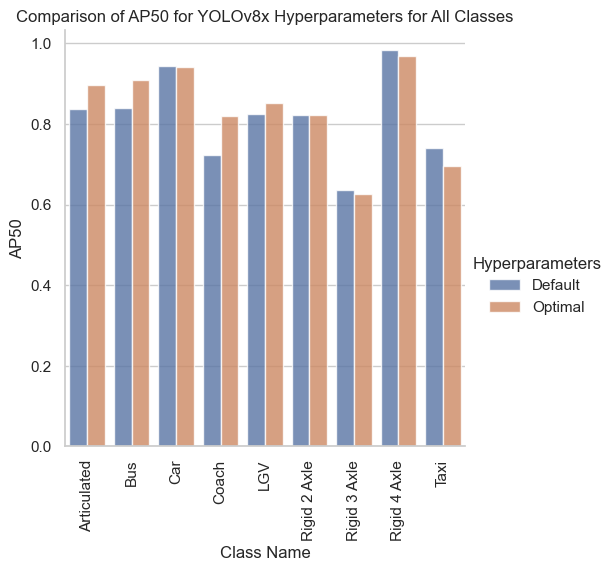

In [37]:
# grouped barplot of AP50 on validation set for all classes
sns.set_theme(style="whitegrid")
fig = sns.catplot(kind="bar",data=yolov8_comparison_ap50_df, x="Class Name", y="AP50", 
                  hue="Hyperparameters", alpha=0.8).set(title="Comparison of AP50 for YOLOv8x Hyperparameters for All Classes")
fig.set_xticklabels(rotation=90)
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Final Models Charts/yolov8_hyperparameters_comparison_all_classes.png", bbox_inches="tight")
plt.show()

### YOLOv10 Comparison
Compare the validation performance of default hyperparameters model with optimal hyperparameters model

In [27]:
# create models
default_v10_model = YOLO(f"{models_folder}yolov10_default_5_epochs.pt")
optimal_v10_model = YOLO(f"{models_folder}yolov10_optimal_hyperparameters_5_epochs.pt")

In [28]:
# validate default model
default_v10_metrics = default_v10_model.val(data=data_yaml_file)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
YOLOv10x summary (fused): 503 layers, 31,601,414 parameters, 0 gradients, 169.9 GFLOPs


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\labels.cache... 359 images, 14 back
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [06:37


                   all        359       2011      0.823      0.716        0.8      0.628
           Articulated         68        113       0.81      0.791      0.862      0.677
                   Bus         56         89       0.91      0.794      0.885      0.745
                   Car        154       1251      0.875      0.899      0.936      0.632
                 Coach         24         29      0.946      0.601      0.745      0.652
                   LGV        180        273      0.824      0.733      0.841      0.636
          Rigid 2 Axle        123        168      0.838      0.555      0.786      0.574
          Rigid 3 Axle         17         17       0.44      0.588      0.487      0.402
          Rigid 4 Axle         41         42      0.883      0.902      0.931      0.781
                  Taxi         20         29       0.88      0.586      0.725      0.552
Speed: 3.0ms preprocess, 1092.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\det

In [29]:
# validate optimal model
optimal_v10_metrics = optimal_v10_model.val(data=data_yaml_file)

Ultralytics YOLOv8.2.78  Python-3.11.7 torch-2.3.1+cpu CPU (AMD Ryzen 7 5800H with Radeon Graphics)
YOLOv10x summary (fused): 503 layers, 31,601,414 parameters, 0 gradients, 169.9 GFLOPs


val: Scanning C:\Users\jamie\Python Projects\Dissertation\Task\datasets\WSP-9\valid\labels.cache... 359 images, 14 back
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [06:10


                   all        359       2011       0.86      0.736      0.825      0.647
           Articulated         68        113      0.813      0.823      0.866      0.681
                   Bus         56         89      0.848      0.843       0.87      0.737
                   Car        154       1251      0.884      0.883      0.942      0.639
                 Coach         24         29      0.919      0.586      0.781      0.689
                   LGV        180        273      0.848       0.78      0.861      0.653
          Rigid 2 Axle        123        168      0.804       0.66      0.805      0.599
          Rigid 3 Axle         17         17          1      0.501      0.633      0.523
          Rigid 4 Axle         41         42      0.846      0.952      0.944      0.783
                  Taxi         20         29      0.776      0.597      0.725      0.518
Speed: 3.0ms preprocess, 1018.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs\det

In [30]:
# create df for class AP50 for both models
yolov10_comparison_ap50_df = pd.DataFrame(
    [["Articulated", default_v10_metrics.box.ap50[0],"Default"],
    ["Articulated", optimal_v10_metrics.box.ap50[0],"Optimal"],
    ["Bus", default_v10_metrics.box.ap50[1],"Default"],
    ["Bus", optimal_v10_metrics.box.ap50[1],"Optimal"],
    ["Car", default_v10_metrics.box.ap50[2],"Default"],
    ["Car", optimal_v10_metrics.box.ap50[2],"Optimal"],
    ["Coach", default_v10_metrics.box.ap50[3],"Default"],
    ["Coach", optimal_v10_metrics.box.ap50[3],"Optimal"],
    ["LGV", default_v10_metrics.box.ap50[4],"Default"],
    ["LGV", optimal_v10_metrics.box.ap50[4],"Optimal"],
    ["Rigid 2 Axle", default_v10_metrics.box.ap50[5],"Default"],
    ["Rigid 2 Axle", optimal_v10_metrics.box.ap50[5],"Optimal"],
    ["Rigid 3 Axle", default_v10_metrics.box.ap50[6],"Default"],
    ["Rigid 3 Axle", optimal_v10_metrics.box.ap50[6],"Optimal"],
    ["Rigid 4 Axle", default_v10_metrics.box.ap50[7],"Default"],
    ["Rigid 4 Axle", optimal_v10_metrics.box.ap50[7],"Optimal"],
    ["Taxi", default_v10_metrics.box.ap50[8],"Default"],
    ["Taxi", optimal_v10_metrics.box.ap50[8],"Optimal"]],
    columns=["Class Name", "AP50", "Hyperparameters"]
)

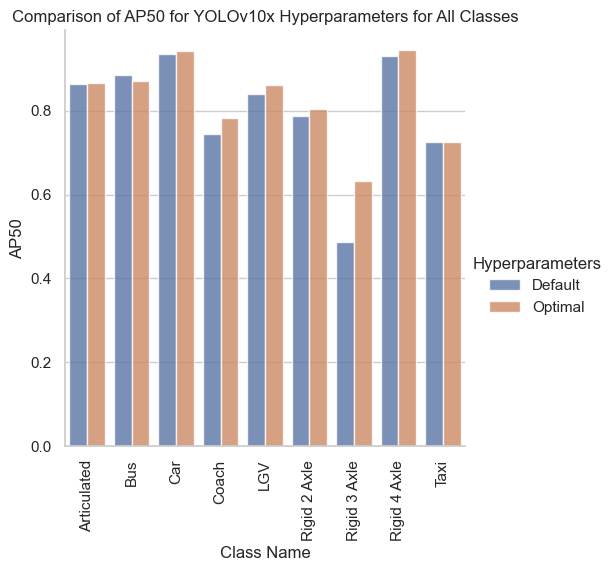

In [43]:
# grouped barplot of AP50 on validation set for all classes
sns.set_theme(style="whitegrid")
fig = sns.catplot(kind="bar",data=yolov10_comparison_ap50_df, x="Class Name", y="AP50", 
                  hue="Hyperparameters", alpha=0.8).set(title="Comparison of AP50 for YOLOv10x Hyperparameters for All Classes")
fig.set_xticklabels(rotation=90)
plt.savefig("C:/Users/jamie/Python Projects/Dissertation/Task/EDA Code/Final Models Charts/yolov10_hyperparameters_comparison_all_classes.png", bbox_inches="tight")
plt.show()